In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\DS,DA\Pokemon_Dataset\Pokemon.csv")

In [3]:
df.shape

(800, 13)

In [4]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
df["HP"].value_counts()

HP
60     67
50     63
70     57
65     46
75     43
       ..
92      1
88      1
56      1
101     1
42      1
Name: count, Length: 94, dtype: int64

Handling Missing Values

In [9]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["Total"].min(), df["HP"].min()

(np.int64(180), np.int64(1))

In [12]:
df["Total"].max(), df["HP"].max()

(np.int64(780), np.int64(255))

In [13]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [14]:
df["Type 2"].fillna('Nothing', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10828\440092314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type 2"].fillna('Nothing', inplace=True)


In [15]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Correcting Inconsistent Data

In [16]:
df["Type 1"].value_counts()#+


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df=df.drop_duplicates(subset=["#"], keep='first')

In [19]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['Offense'] = df['Attack'] + df['Sp. Atk']


In [25]:
df['Defense'] = df['Defense'] + df['Sp. Def']

In [24]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Offense'],
      dtype='object')

Finalize

In [30]:
df.to_csv("PokemonOutput.csv",index=0)

Visualization

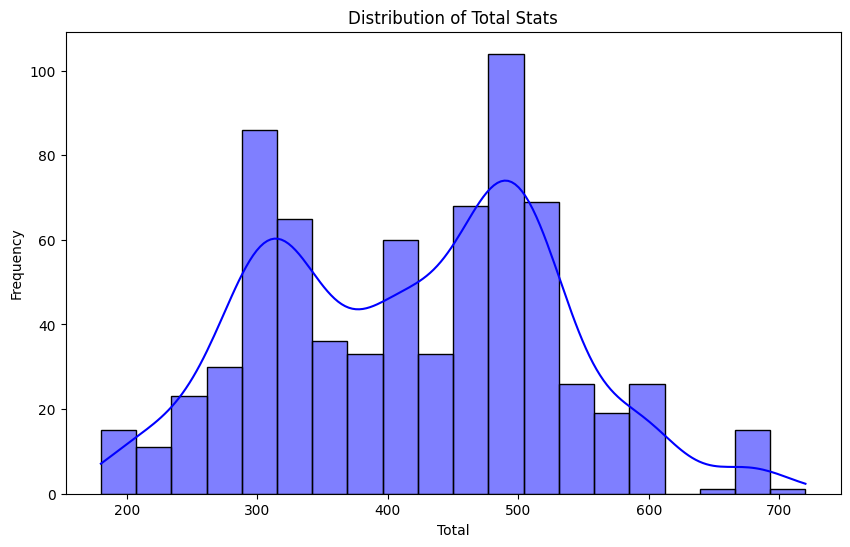

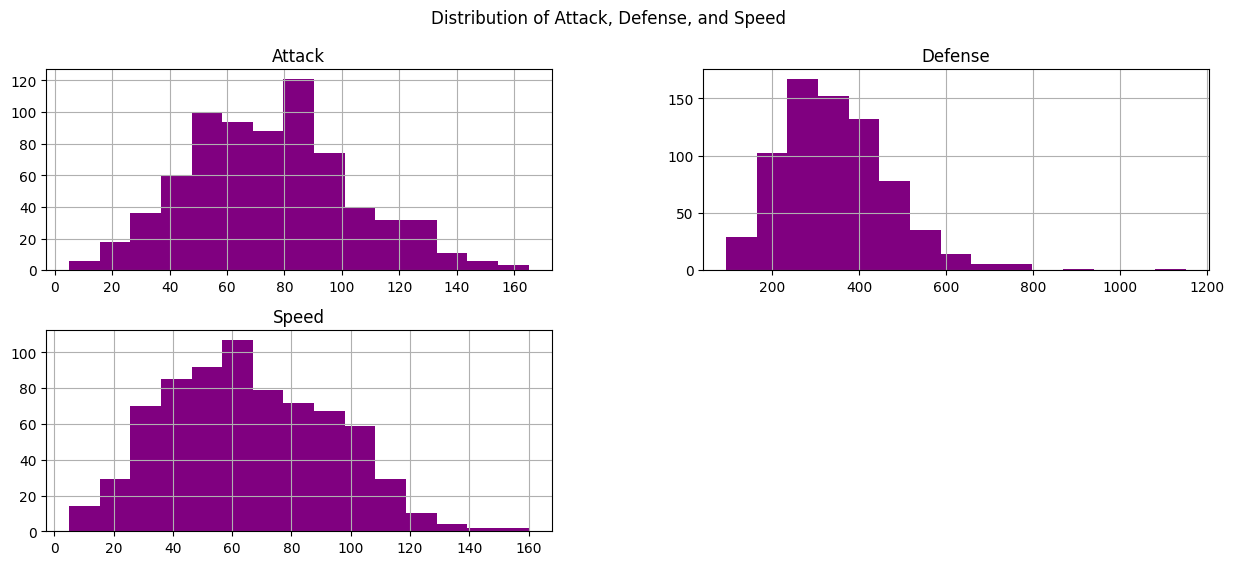

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for 'Total'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=True, bins=20, color='blue')
plt.title('Distribution of Total Stats')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()


# Histograms for multiple columns
numerical_columns = ['Attack', 'Defense', 'Speed']
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 2), color='purple')
plt.suptitle('Distribution of Attack, Defense, and Speed')
plt.show()
